## Fetal Health Prediction

Given *data about fetuses*, let's try to predict the **health** of a given fetus.

We will use a variety of classification models to make our predictions.

Data source: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('archive/fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### Preprocessing

In [4]:
df = data.copy()

In [6]:
df.isna().sum().sum()

np.int64(0)

In [14]:
CLASS_NAMES = ['NORMAL', 'SUSPECT', 'PATHOLOGICAL']

### Exploratory Data Analysis

In [7]:
eda_df = df.copy()

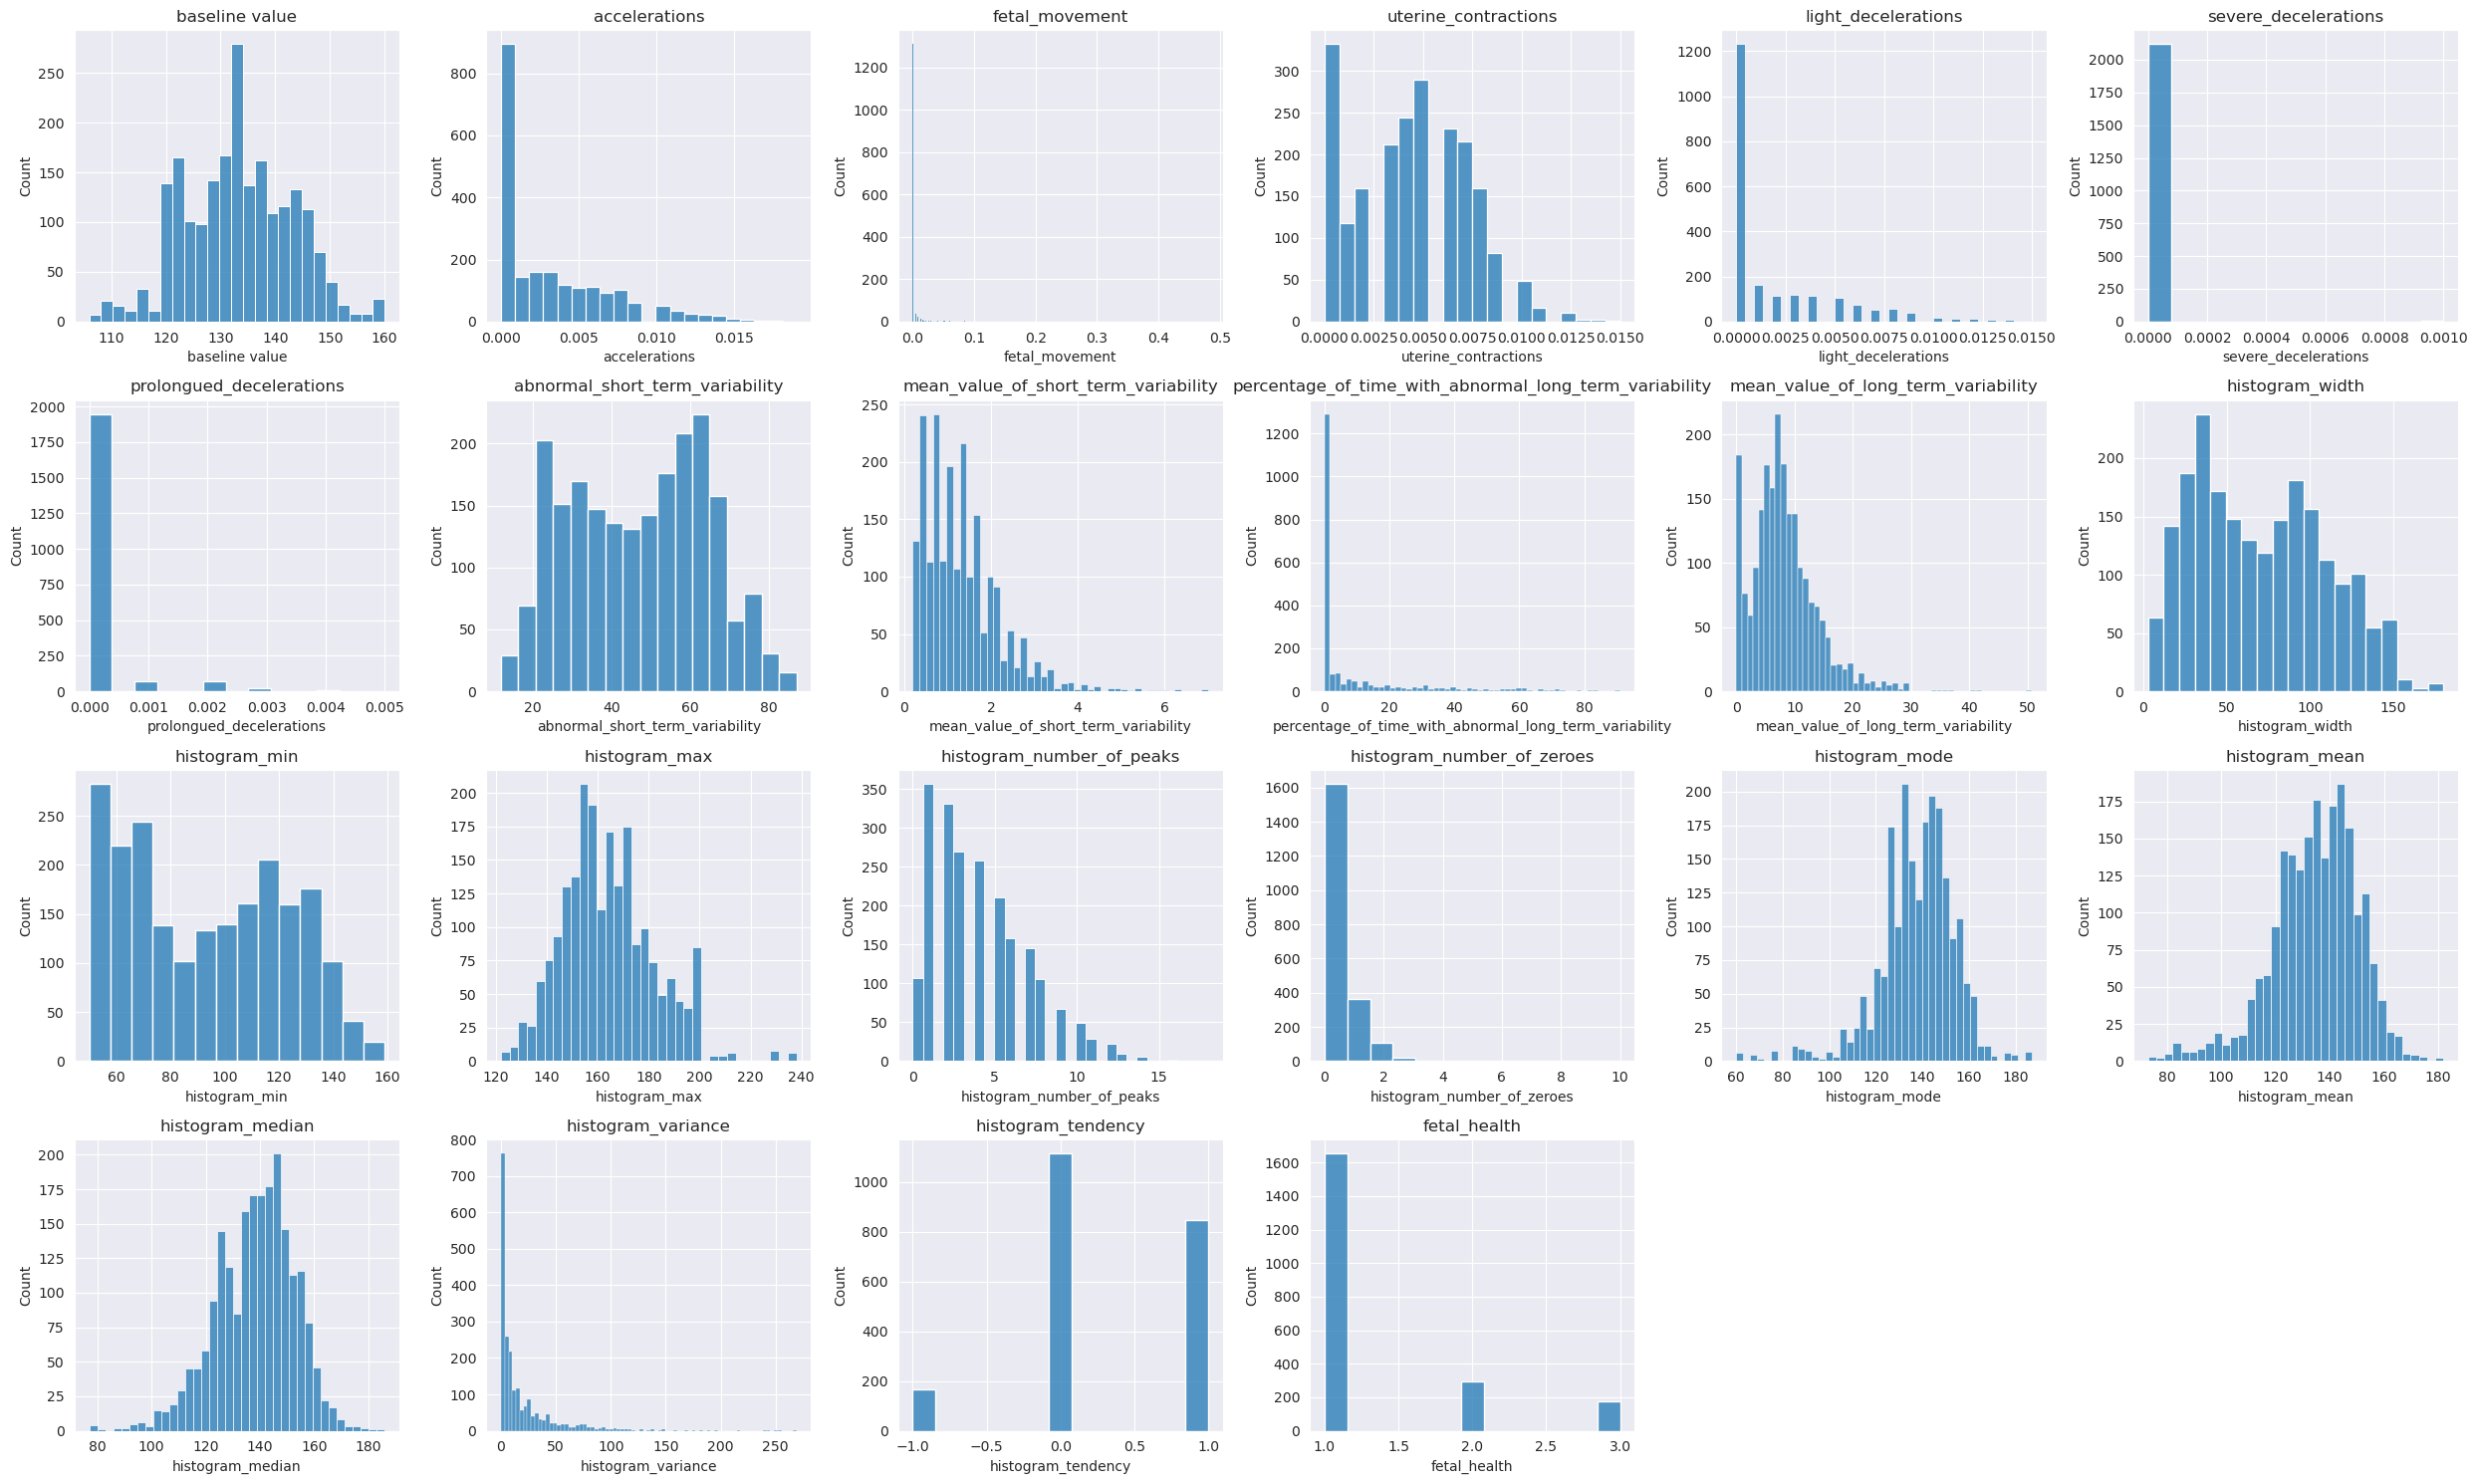

In [9]:
plt.figure(figsize=(25,15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i+1)
    sns.histplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

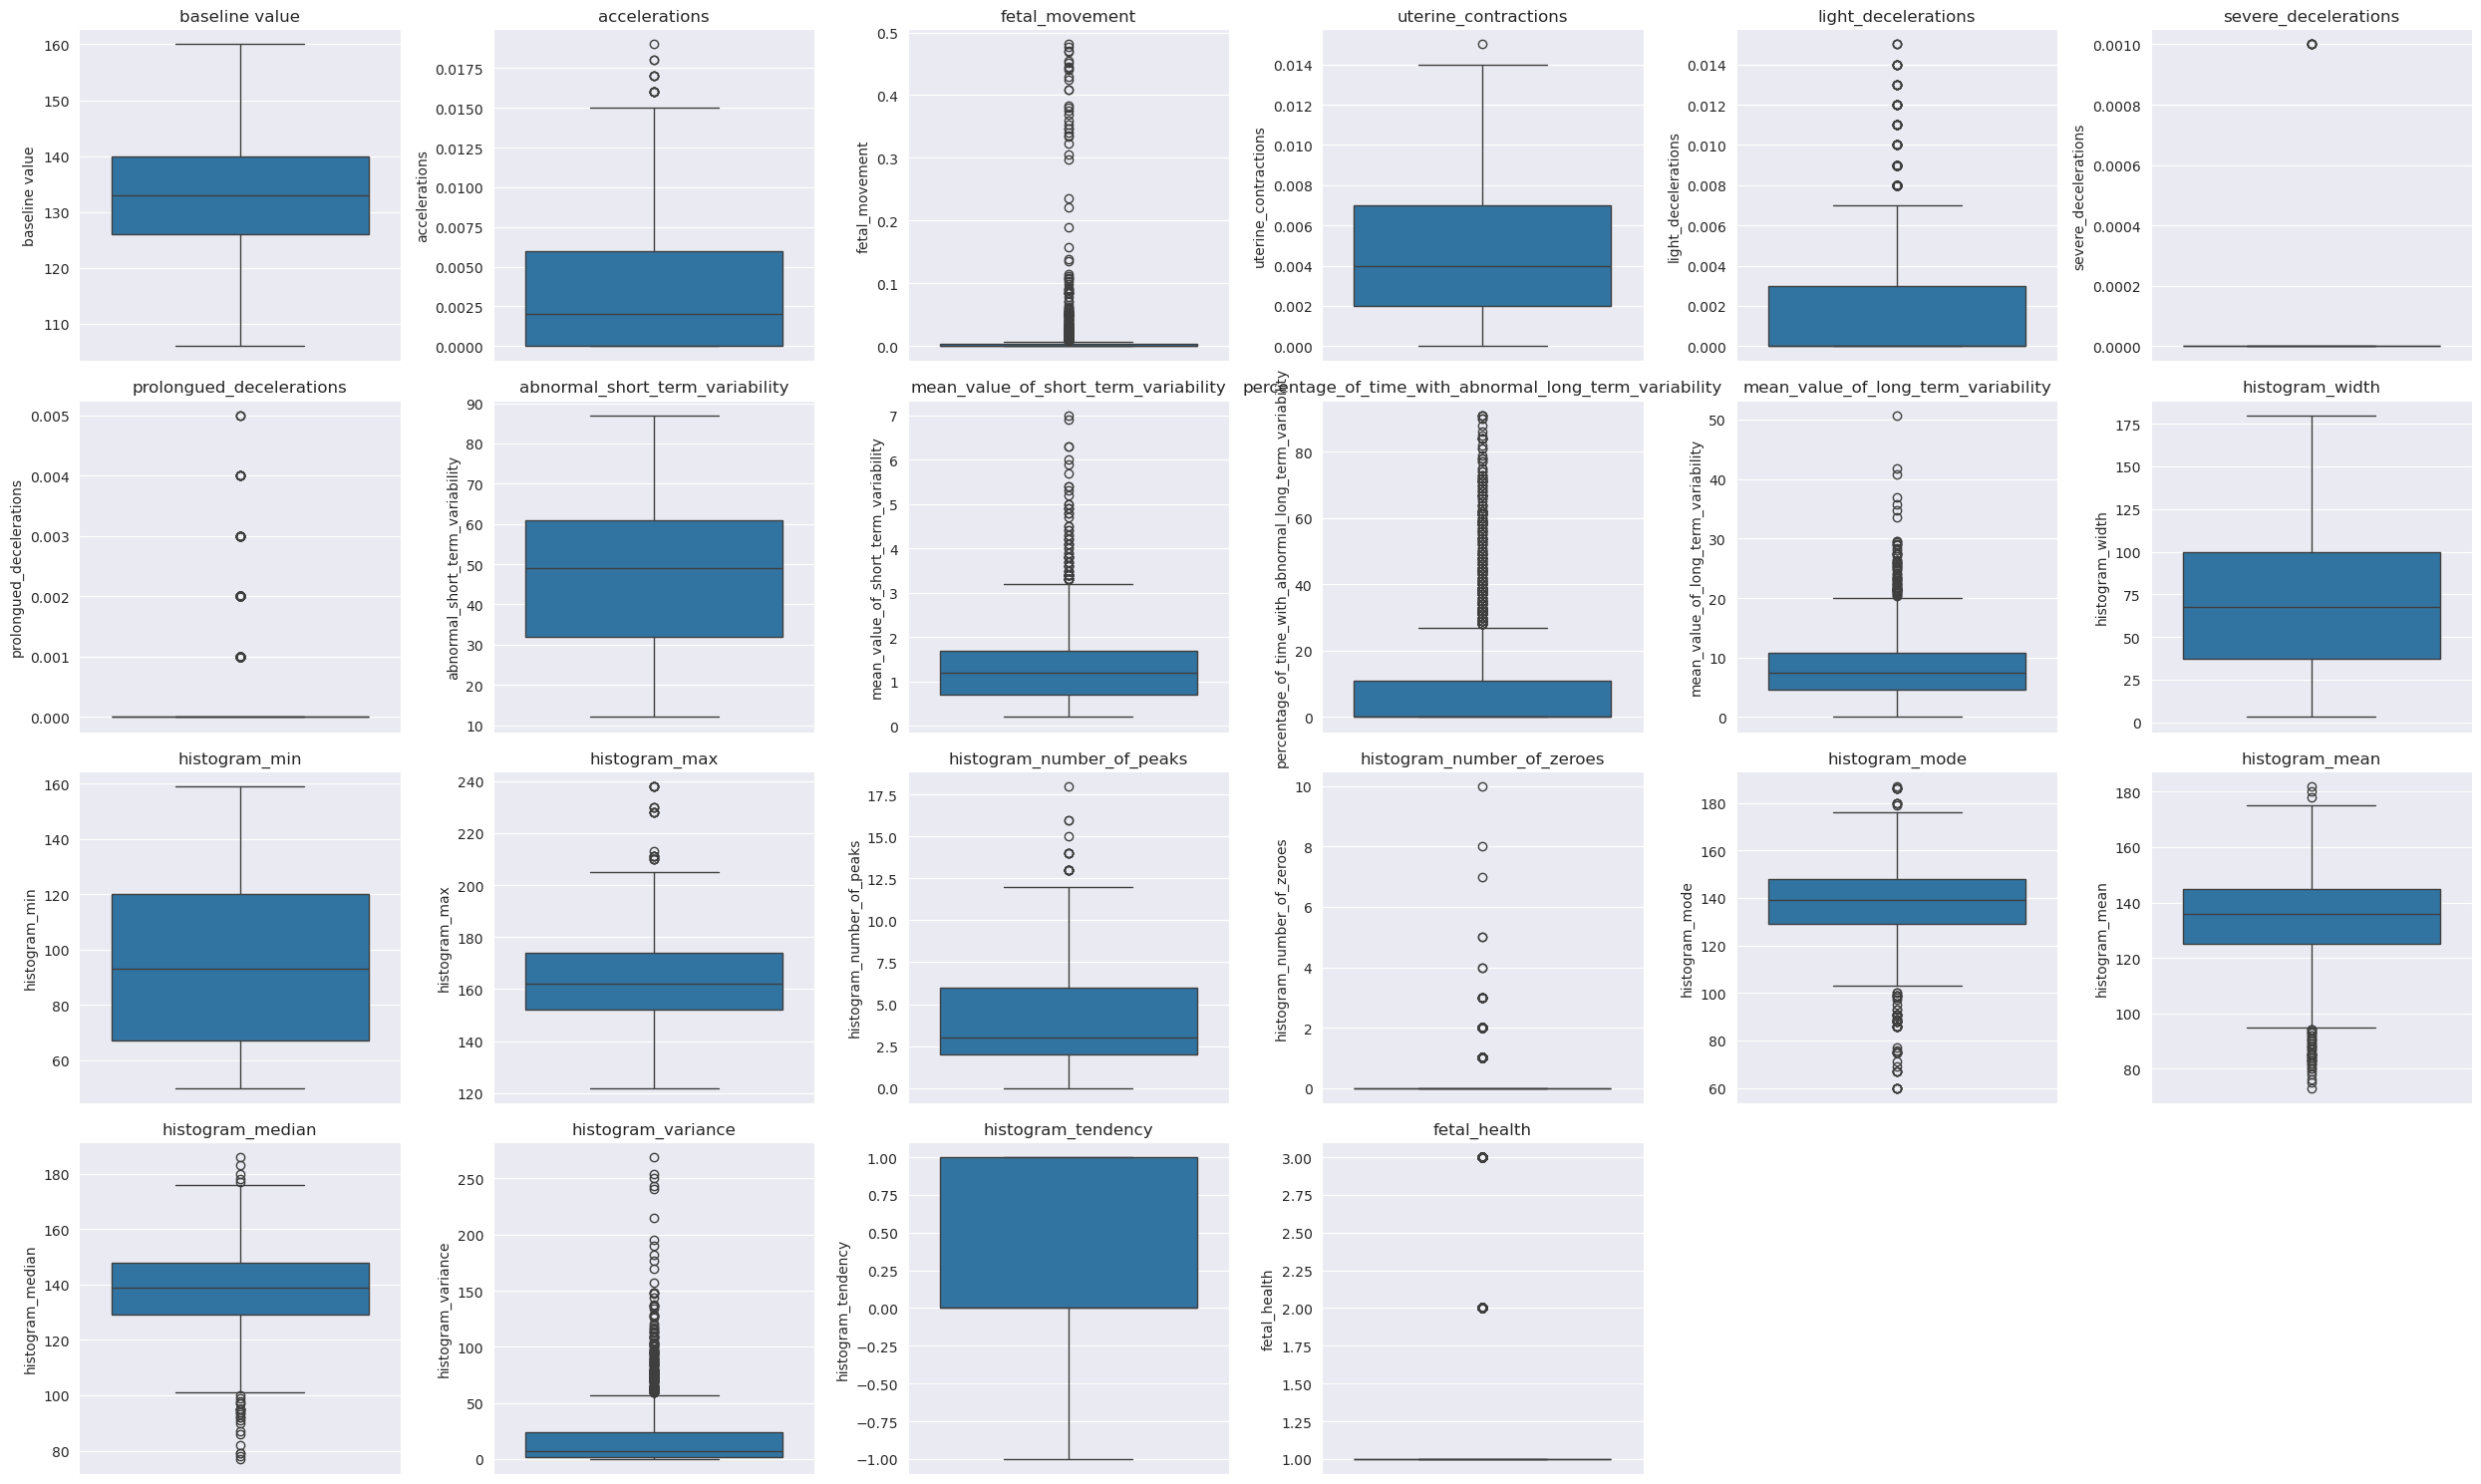

In [10]:
plt.figure(figsize=(25,15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i+1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

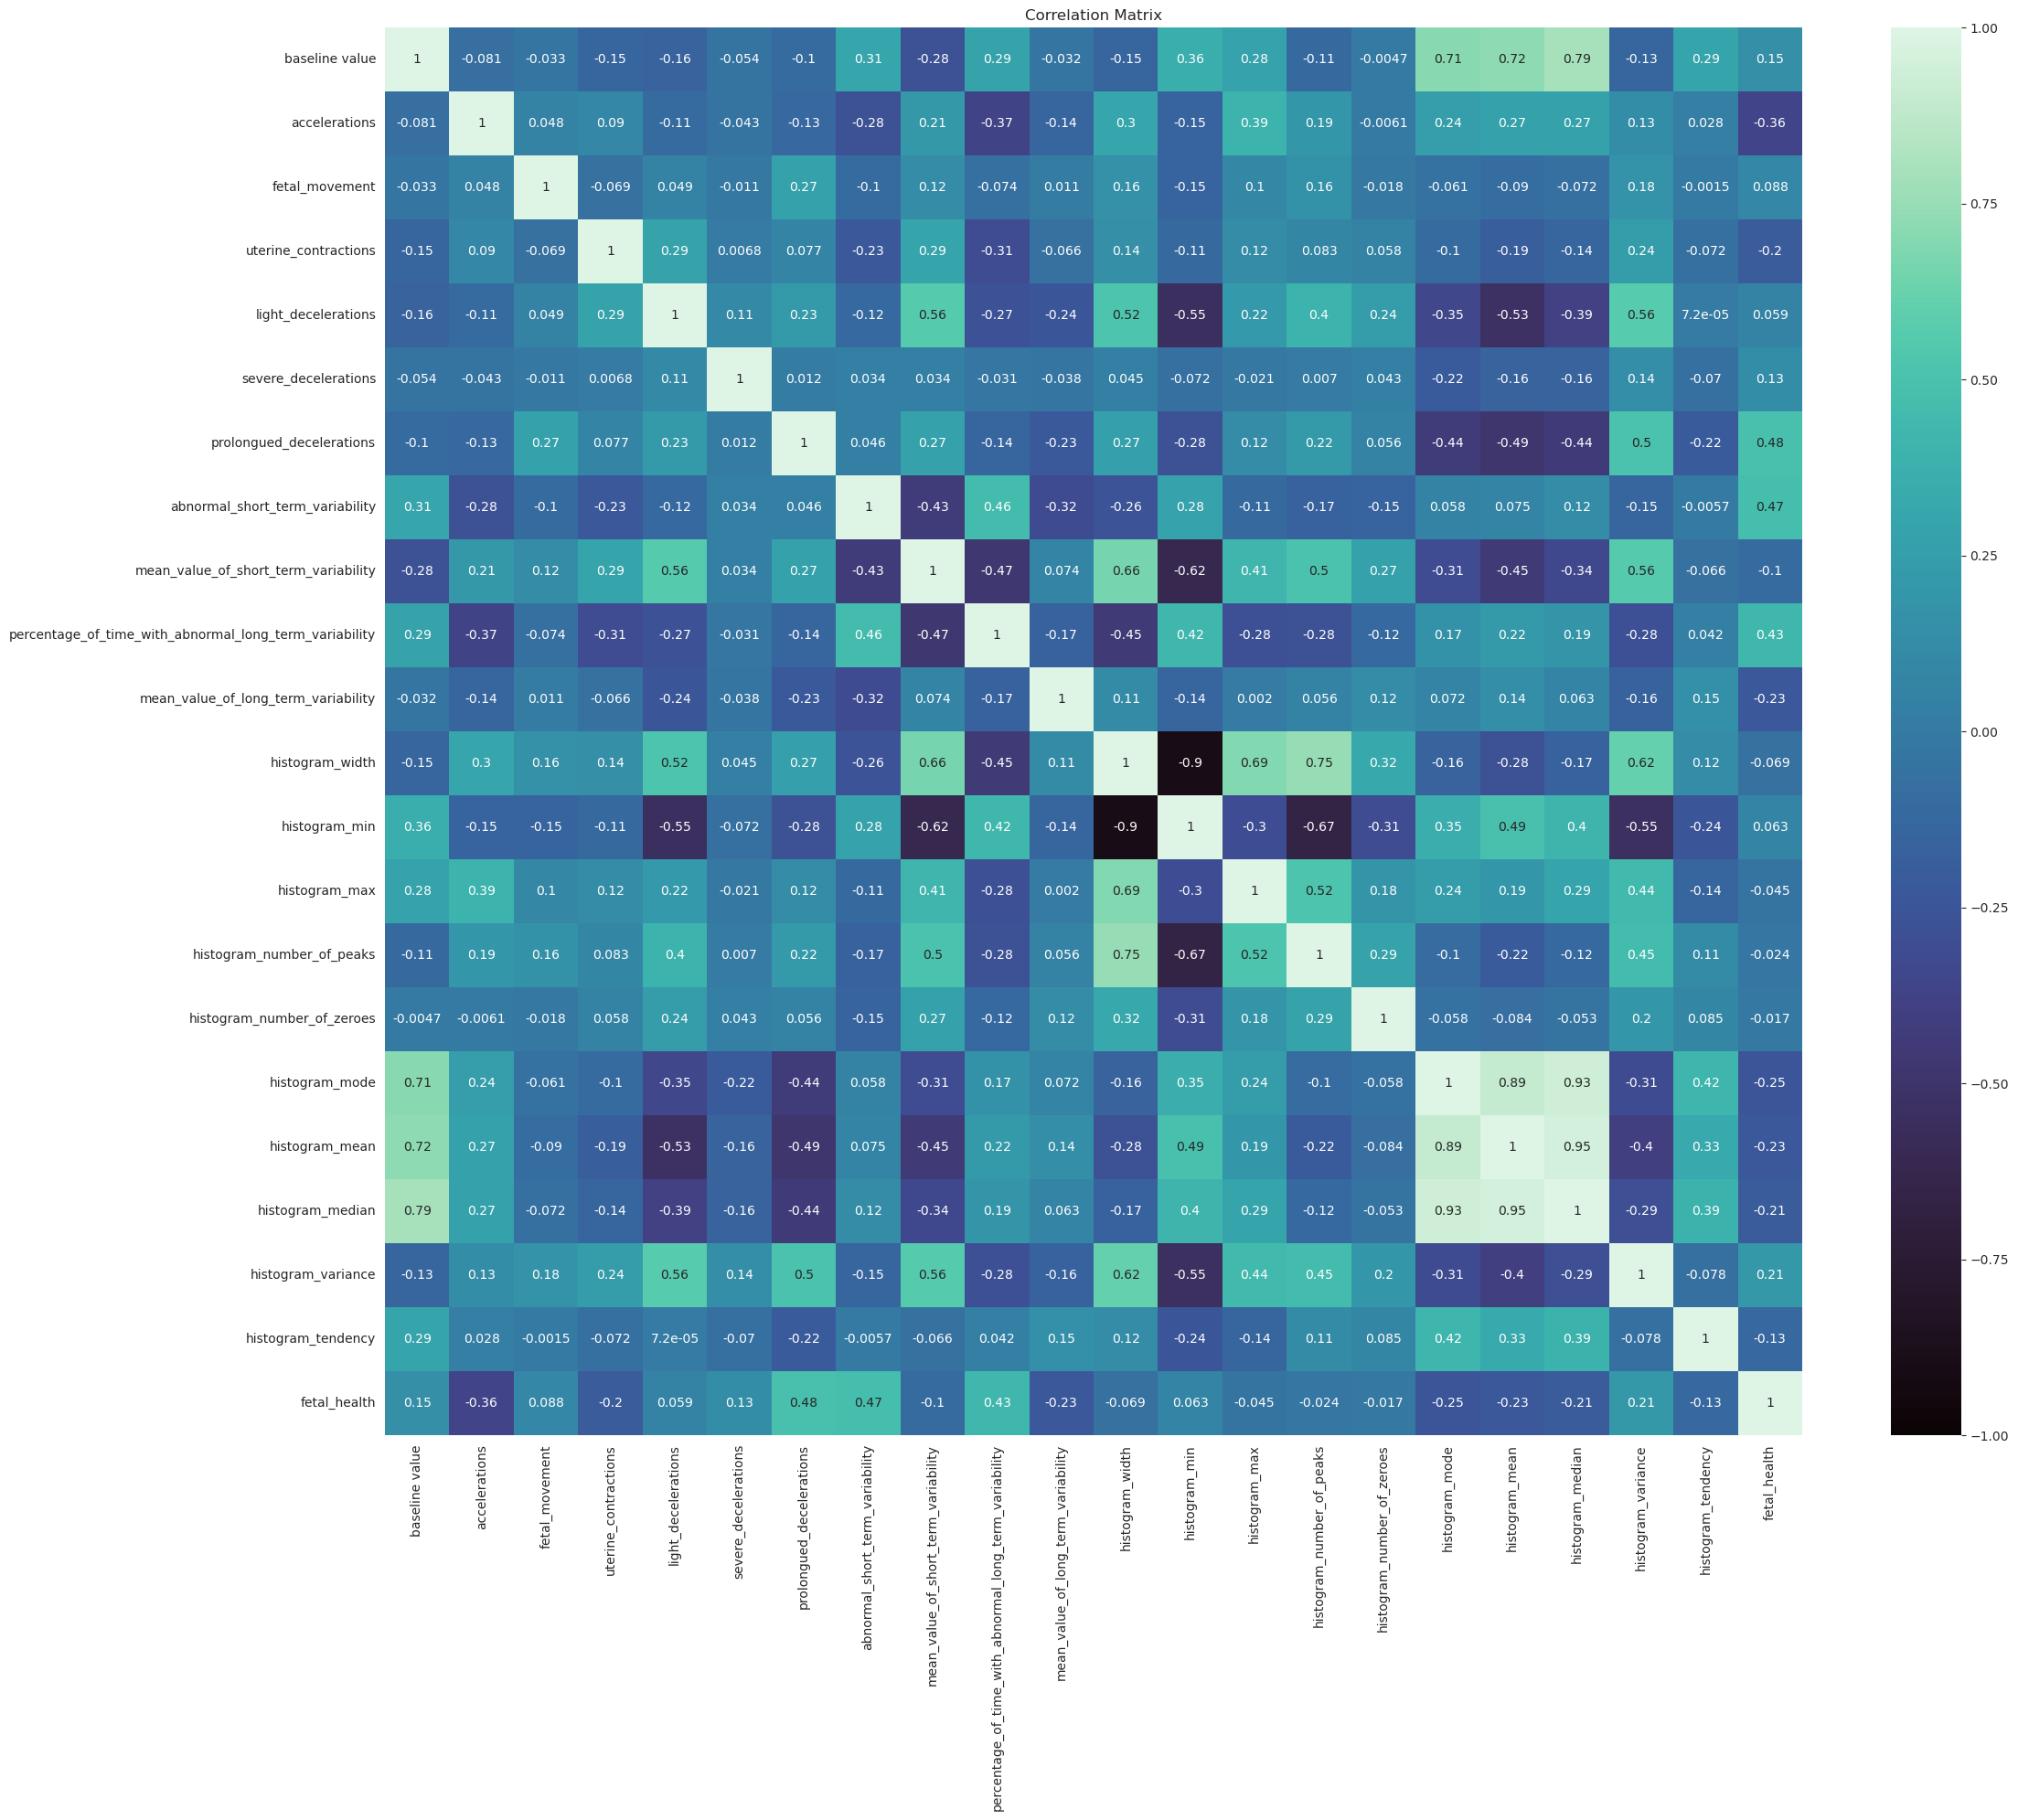

In [12]:
corr = eda_df.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [13]:
eda_df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [15]:
CLASS_NAMES

['NORMAL', 'SUSPECT', 'PATHOLOGICAL']

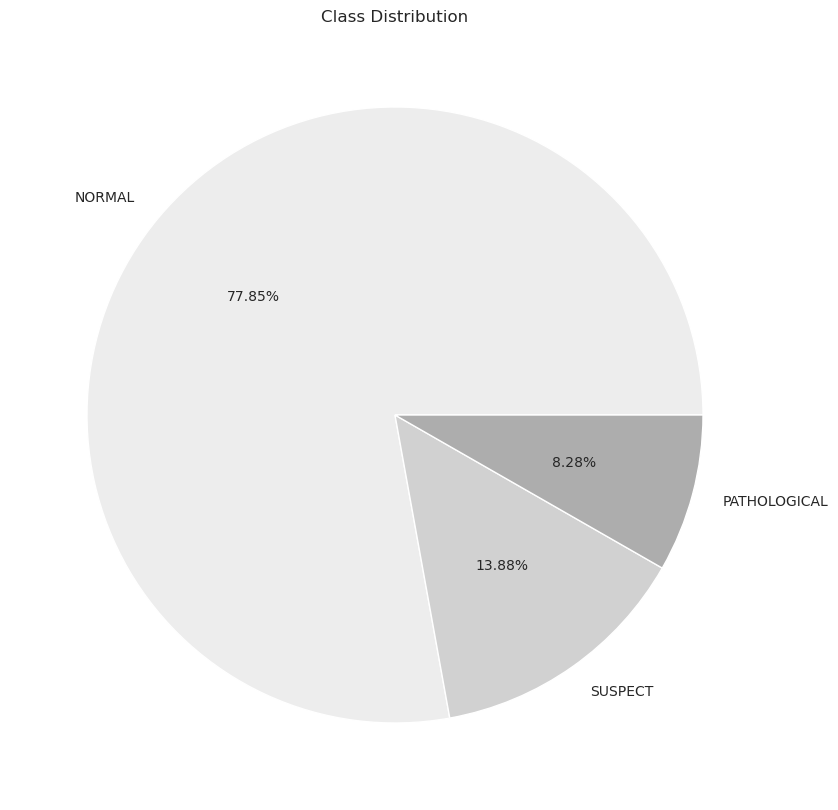

In [18]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels = CLASS_NAMES,
    colors=sns.color_palette('Greys')
)

plt.title("Class Distribution")
plt.show()

In [19]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [20]:
# Rename target values
df['fetal_health'] = df['fetal_health'].replace({
    1.0: 'NORMAL',
    2.0: 'SUSPECT',
    3.0: 'PATHOLOGICAL'
})

In [21]:
# Split df into X and y
y = df['fetal_health'].copy()
X = df.drop('fetal_health', axis=1).copy()

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [24]:
X_train.shape, X_test.shape

((1488, 21), (638, 21))

In [25]:
y_train

1178          NORMAL
408          SUSPECT
802          SUSPECT
22      PATHOLOGICAL
204           NORMAL
            ...     
960           NORMAL
905           NORMAL
1096          NORMAL
235           NORMAL
1061          NORMAL
Name: fetal_health, Length: 1488, dtype: object

In [26]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)

In [27]:
X_train.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1488.000000,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03,1.488000e+03
mean,1.014123e-15,-6.446456e-17,-7.162729e-18,-9.550306e-18,0.000000,-1.074409e-17,4.655774e-17,7.640244e-17,-4.536395e-17,2.029440e-17,1.074409e-17,2.626334e-17,7.162729e-18,7.998381e-17,1.444484e-16,1.910061e-17,-3.760433e-16,7.890940e-16,1.238555e-16,-1.790682e-17,-3.342607e-17
std,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00,1.000336e+00
min,-2.834574e+00,-8.222844e-01,-2.040945e-01,-1.477290e+00,-0.651135,-5.191741e-02,-2.774379e-01,-2.023315e+00,-1.297591e+00,-5.372336e-01,-1.457899e+00,-1.758323e+00,-1.467734e+00,-2.302810e+00,-1.406347e+00,-4.542516e-01,-4.723020e+00,-3.840100e+00,-4.160465e+00,-6.537626e-01,-2.146877e+00
25%,-7.549732e-01,-8.222844e-01,-2.040945e-01,-8.010227e-01,-0.651135,-5.191741e-02,-2.774379e-01,-8.633039e-01,-7.264114e-01,-5.372336e-01,-6.350228e-01,-8.793787e-01,-8.876847e-01,-6.753005e-01,-7.160468e-01,-4.542516e-01,-5.074441e-01,-6.104622e-01,-6.241886e-01,-5.841676e-01,-5.252764e-01
50%,-2.711307e-02,-3.042661e-01,-2.040945e-01,-1.247550e-01,-0.651135,-5.191741e-02,-2.774379e-01,6.470492e-02,-1.552319e-01,-5.372336e-01,-1.269079e-01,-7.798824e-02,-5.173116e-02,-1.140901e-01,-2.574707e-02,-4.542516e-01,1.035089e-01,1.000580e-01,6.919896e-02,-3.753827e-01,-5.252764e-01
75%,7.007471e-01,7.317705e-01,-1.380744e-01,8.896465e-01,0.353589,-5.191741e-02,-2.774379e-01,8.187121e-01,4.159477e-01,6.779182e-02,4.846287e-01,7.492535e-01,9.207046e-01,5.593623e-01,6.645527e-01,-4.542516e-01,6.533666e-01,6.813927e-01,6.932478e-01,1.813773e-01,1.096324e+00
max,2.780348e+00,4.098890e+00,1.038114e+01,3.594717e+00,4.372484,1.926136e+01,8.012272e+00,2.326727e+00,6.356215e+00,4.467976e+00,7.661190e+00,2.817358e+00,2.251406e+00,4.151108e+00,4.806351e+00,1.345370e+01,3.036084e+00,3.071324e+00,3.328121e+00,8.184801e+00,1.096324e+00


### Training

In [40]:
y_train_xgb = y_train.replace({'NORMAL': 0,
                              'SUSPECT': 1,
                              'PATHOLOGICAL': 2})

y_test_xgb = y_test.replace({'NORMAL': 0,
                              'SUSPECT': 1,
                              'PATHOLOGICAL': 2})

In [41]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
    "                              CatBoost": CatBoostClassifier(verbose=0)
}

In [44]:
for name, model in models.items():
    if name.strip() != 'XGBoost':
        model.fit(X_train, y_train)
        print(name + " trained.")
    else:
        model.fit(X_train, y_train_xgb)
        print(name + ' trained.')

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1192
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.244712
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.011883
[LightGBM] [Warning] No further splits

### Results

In [45]:
for name, model in models.items():
    if name.strip() != 'XGBoost':
        print(name + ": {:.2f}%".format(model.score(X_test, y_test)*100))
    else:
        print(name + ": {:.2f}%".format(model.score(X_test, y_test_xgb)*100))

                   Logistic Regression: 90.13%
                   K-Nearest Neighbors: 89.97%
                         Decision Tree: 91.85%
Support Vector Machine (Linear Kernel): 89.03%
   Support Vector Machine (RBF kernel): 91.07%
                        Neural Network: 91.54%
                         Random Forest: 93.57%
                     Gradient Boosting: 94.98%
                               XGBoost: 94.98%
                              LightGBM: 94.67%
                              CatBoost: 94.20%
